<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_0_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.606864,45.769848,43.629204,38.071116,-0.424947,158.652086,159.058020,-0.405934
1,0.0,1.0,67.747669,38.923309,36.109753,82.459824,0.119118,235.359673,235.302584,0.057088
2,0.0,2.0,31.506649,36.257651,50.850415,81.857387,-0.142144,210.329959,210.483916,-0.153957
3,0.0,3.0,61.206785,34.997350,67.653946,92.742154,-0.322821,266.277414,266.656559,-0.379145
4,0.0,4.0,37.720522,39.270867,75.080191,66.386091,0.331085,228.788755,228.471039,0.317717
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,36.750974,53.272204,66.398283,39.915975,-0.122609,206.214827,206.360000,-0.145174
249996,999.0,246.0,69.372515,33.330212,69.811174,55.681539,-0.214307,237.981134,238.222886,-0.241751
249997,999.0,247.0,30.864381,52.514017,70.313811,93.627284,0.112123,257.431615,257.303672,0.127943
249998,999.0,248.0,45.676974,76.419974,52.688522,99.258363,-0.156819,283.887015,284.001284,-0.114269


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.606864  45.769848  43.629204  38.071116 -0.424947  158.652086   
      1.0    67.747669  38.923309  36.109753  82.459824  0.119118  235.359673   
      2.0    31.506649  36.257651  50.850415  81.857387 -0.142144  210.329959   
      3.0    61.206785  34.997350  67.653946  92.742154 -0.322821  266.277414   
      4.0    37.720522  39.270867  75.080191  66.386091  0.331085  228.788755   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  36.750974  53.272204  66.398283  39.915975 -0.122609  206.214827   
      246.0  69.372515  33.330212  69.811174  55.681539 -0.214307  237.981134   
      247.0  30.864381  52.514017  70.313811  93.627284  0.112123  257.431615   
      248.0  45.676974  76.419974  52.688522  99.258363 -0.156819  283.887015   
      249.0  55.696972  34.296419  56.134506  86.749324 -0.335828  242.541393   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    159.058020 -0.405934  
      1.0    235.302584  0.057088  
      2.0    210.483916 -0.153957  
      3.0    266.656559 -0.379145  
      4.0    228.471039  0.317717  
...                 ...       ...  
999.0 245.0  206.360000 -0.145174  
      246.0  238.222886 -0.241751  
      247.0  257.303672  0.127943  
      248.0  284.001284 -0.114269  
      249.0  242.877108 -0.335715  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.606864  45.769848  43.629204  38.071116 -0.424947  158.652086   
      1.0    67.747669  38.923309  36.109753  82.459824  0.119118  235.359673   
      2.0    31.506649  36.257651  50.850415  81.857387 -0.142144  210.329959   
      3.0    61.206785  34.997350  67.653946  92.742154 -0.322821  266.277414   
      4.0    37.720522  39.270867  75.080191  66.386091  0.331085  228.788755   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  36.750974  53.272204  66.398283  39.915975 -0.122609  206.214827   
      246.0  69.372515  33.330212  69.811174  55.681539 -0.214307  237.981134   
      247.0  30.864381  52.514017  70.313811  93.627284  0.112123  257.431615   
      248.0  45.676974  76.419974  52.688522  99.258363 -0.156819  283.887015   
      249.0  55.696972  34.296419  56.134506  86.749324 -0.335828  242.541393   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    159.058020 -0.405934  
      1.0    235.302584  0.057088  
      2.0    210.483916 -0.153957  
      3.0    266.656559 -0.379145  
      4.0    228.471039  0.317717  
...                 ...       ...  
999.0 245.0  206.360000 -0.145174  
      246.0  238.222886 -0.241751  
      247.0  257.303672  0.127943  
      248.0  284.001284 -0.114269  
      249.0  242.877108 -0.335715  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.606864,45.769848,43.629204,38.071116,-0.424947,158.652086,159.058020,-0.405934
1,0.0,1.0,67.747669,38.923309,36.109753,82.459824,0.119118,235.359673,235.302584,0.057088
2,0.0,2.0,31.506649,36.257651,50.850415,81.857387,-0.142144,210.329959,210.483916,-0.153957
3,0.0,3.0,61.206785,34.997350,67.653946,92.742154,-0.322821,266.277414,266.656559,-0.379145
4,0.0,4.0,37.720522,39.270867,75.080191,66.386091,0.331085,228.788755,228.471039,0.317717
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,36.750974,53.272204,66.398283,39.915975,-0.122609,206.214827,206.360000,-0.145174
249996,999.0,246.0,69.372515,33.330212,69.811174,55.681539,-0.214307,237.981134,238.222886,-0.241751
249997,999.0,247.0,30.864381,52.514017,70.313811,93.627284,0.112123,257.431615,257.303672,0.127943
249998,999.0,248.0,45.676974,76.419974,52.688522,99.258363,-0.156819,283.887015,284.001284,-0.114269


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.606864  45.769848  43.629204  38.071116 -0.424947  158.652086   
      1.0    67.747669  38.923309  36.109753  82.459824  0.119118  235.359673   
      2.0    31.506649  36.257651  50.850415  81.857387 -0.142144  210.329959   
      3.0    61.206785  34.997350  67.653946  92.742154 -0.322821  266.277414   
      4.0    37.720522  39.270867  75.080191  66.386091  0.331085  228.788755   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  36.750974  53.272204  66.398283  39.915975 -0.122609  206.214827   
      246.0  69.372515  33.330212  69.811174  55.681539 -0.214307  237.981134   
      247.0  30.864381  52.514017  70.313811  93.627284  0.112123  257.431615   
      248.0  45.676974  76.419974  52.688522  99.258363 -0.156819  283.887015   
      249.0  55.696972  34.296419  56.134506  86.749324 -0.335828  242.541393   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    159.058020 -0.405934  
      1.0    235.302584  0.057088  
      2.0    210.483916 -0.153957  
      3.0    266.656559 -0.379145  
      4.0    228.471039  0.317717  
...                 ...       ...  
999.0 245.0  206.360000 -0.145174  
      246.0  238.222886 -0.241751  
      247.0  257.303672  0.127943  
      248.0  284.001284 -0.114269  
      249.0  242.877108 -0.335715  

[250000 rows x 8 columns]

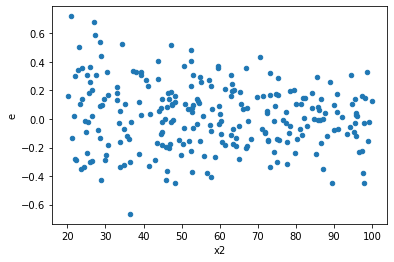

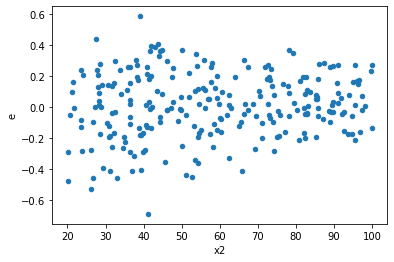

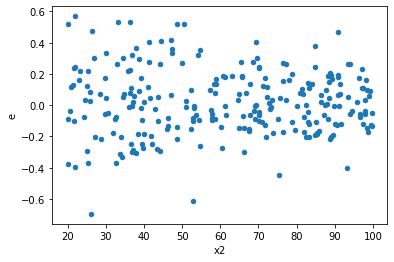

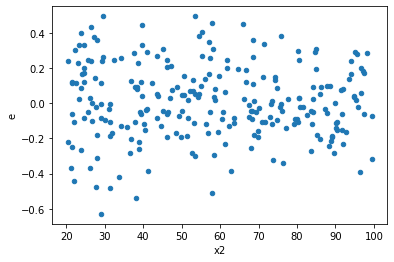

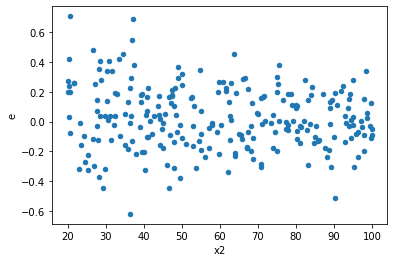

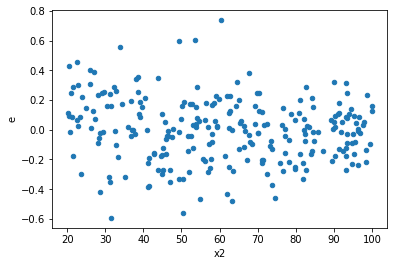

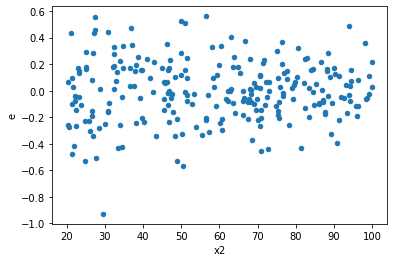

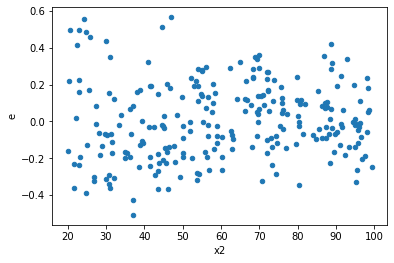

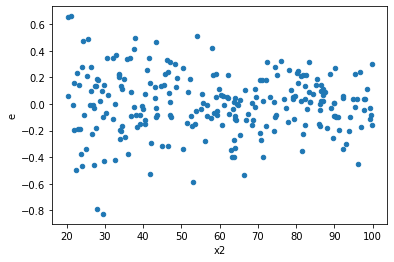

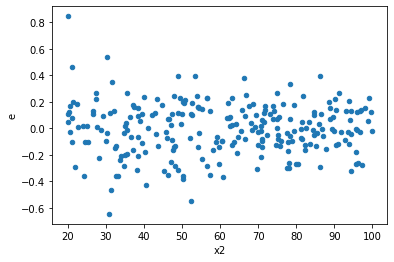

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,131.0,111.0,3.4012781833805725,7.281340902620041,0.02596395559832498,0.06559766578936974,2.5264896768503817,8.706290517412896e-07,0.9999995646854741,4.353145258706448e-07,Reject001=0 : Heteroscedasticity
6.0,130.0,112.0,4.504582462894998,7.949025869136648,0.03465063432996152,0.07097344526014863,2.0482581814896155,0.00012002119822751567,0.9999399894008862,6.0010599113757834e-05,Reject001=0 : Heteroscedasticity
9.0,123.0,119.0,3.54244203822784,5.5418351227212925,0.02880034177421008,0.04657004304807809,1.6169961944611466,0.008782734864151154,0.9956086325679244,0.004391367432075577,Reject001=0 : Heteroscedasticity
10.0,130.0,112.0,4.933134841411245,4.947686856058931,0.0379471910877788,0.04417577550052617,1.1641382203583794,0.40915990548012227,0.7954200472599389,0.20457995274006113,Reject001=1 : Homoscedasticity
13.0,121.0,121.0,4.132018302100851,7.0856879946039,0.03414891158761034,0.05855940491408182,1.7148249297446985,0.0032559914691465686,0.9983720042654267,0.0016279957345732843,Reject001=0 : Heteroscedasticity
14.0,109.0,133.0,3.7846213843192804,6.658208660362275,0.03472129710384661,0.050061719250844176,1.4418159293161334,0.04432550173318717,0.9778372491334064,0.022162750866593584,Reject001=1 : Homoscedasticity
16.0,109.0,133.0,3.277763883119585,7.943663557969168,0.03007122828550078,0.05972679366894111,1.98617738862829,0.00017002514920494427,0.9999149874253975,8.501257460247214e-05,Reject001=0 : Heteroscedasticity
17.0,115.0,127.0,4.356710313293602,5.164082140636025,0.03788443750690089,0.04066206409949626,1.0733184065908175,0.695745013575904,0.652127493212048,0.347872506787952,Reject001=1 : Homoscedasticity
19.0,133.0,109.0,3.6714708875533875,5.95126794802777,0.027605044267318704,0.054598788514016235,1.977855495731087,0.0002684644428978533,0.9998657677785511,0.00013423222144892666,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,119.0,123.0,6.542690605777374,6.115900451790019,0.05498059332586029,0.04972276790073186,0.9043694309741943,0.5820742230605102,Reject001=1 : Homoscedasticity
1.0,125.0,117.0,5.411229142821872,4.726292417289162,0.04328983314257498,0.040395661686232154,0.9331443148138068,0.7026874322663151,Reject001=1 : Homoscedasticity
2.0,131.0,111.0,3.4012781833805725,7.281340902620041,0.02596395559832498,0.06559766578936974,2.5264896768503817,8.706290517412896e-07,Reject001=0 : Heteroscedasticity
3.0,133.0,109.0,6.232748207989058,4.318967928396295,0.04686276848112074,0.0396235589761128,0.8455232215330097,0.3552244571811615,Reject001=1 : Homoscedasticity
4.0,123.0,119.0,6.34723724097755,3.797459337996825,0.05160355480469553,0.03191142300837668,0.6183958281392077,0.008549508419457428,Reject001=0 : Heteroscedasticity
5.0,115.0,127.0,5.6725106893161374,5.057626404833206,0.04932617990709685,0.03982382995931658,0.8073568647384124,0.24325883390302222,Reject001=1 : Homoscedasticity
6.0,130.0,112.0,4.504582462894998,7.949025869136648,0.03465063432996152,0.07097344526014863,2.0482581814896155,0.00012002119822751567,Reject001=0 : Heteroscedasticity
7.0,129.0,113.0,6.228071799597482,4.102078791386752,0.04827962635346886,0.036301582224661524,0.7519027168704109,0.1168952909844679,Reject001=1 : Homoscedasticity
8.0,111.0,131.0,6.239661455325327,6.492890562808752,0.056213166264192135,0.04956405009777673,0.8817160354361518,0.49515984810696145,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      768
Reject001=0 : Heteroscedasticity    232
Name: Result_test, dtype: int64